# 4.9 INTRO TO DATA VISUALIZATION WITH PYTHON
** **
 
### PART 2

Create some visualizations, conduct some exploratory analysis, and begin wrapping up everything for the final report for stakeholders.

**SCRIPT CONTENTS:**

1. Importing Libraries & Files
2. Create charts:
    - Bar chart
    - Histogram
    - Scatterplot
    - Sampling Data
    - Line Charts
3. Exporting Charts as images **(.png file)**

** **
#### 1. IMPORTING LIBRARIES & FILES

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Document File Location

path = r'C:\Users\G\12-2022 Instacart Basket Analysis'

In [3]:
# Import Recent Merged File (order, products & customer DataFrames)

final_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_final.pkl'))

In [4]:
# Check dateframe Output

final_df.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,order_frequency_flag,Name,Surname,Gender,State,Age,Member_Since,No_of_Dependants,Marital_Status,Income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
# Check dateframe Shape

final_df.shape

(32404854, 34)

****
#### 2. CREATE CHARTS

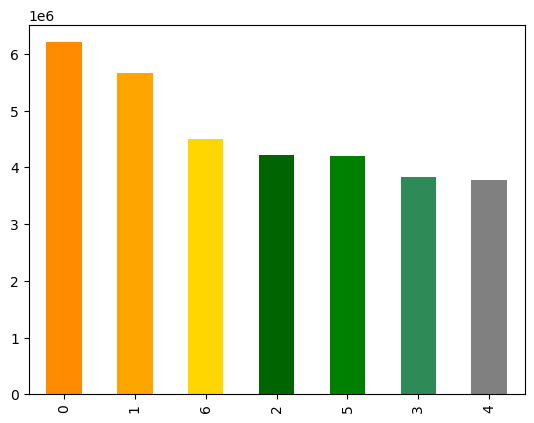

In [6]:
# Create a Bar Chart

bar_chart = final_df['order_day_of_week'].value_counts().plot.bar(color = ['darkorange', 'orange', 'gold', 'darkgreen', 'green', 'seagreen', 'grey'])

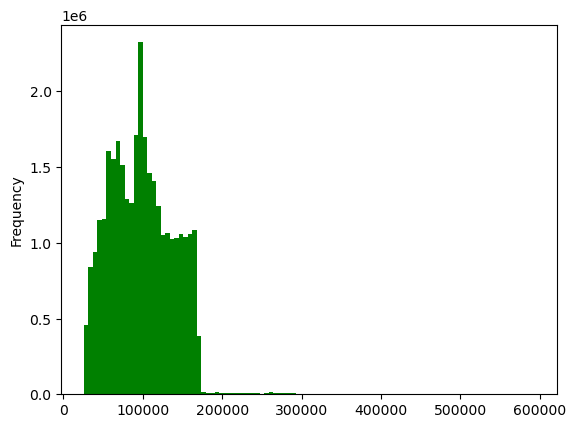

In [7]:
# Creating Histogram

hist1 = final_df['Income'].plot.hist(bins = 100, color = 'green')

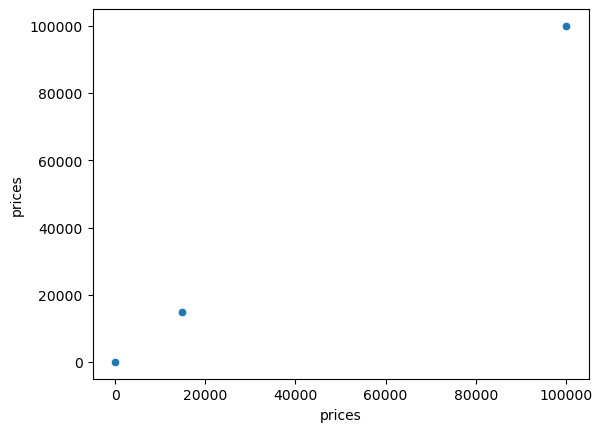

In [8]:
# Creating Scatterplot

scatterplot1 = sns.scatterplot(x = 'prices', y = 'prices', data = final_df)

In [9]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(final_df)) <= 0.7

dev

array([False,  True, False, ...,  True,  True,  True])

In [10]:
# Run test

np.random.rand(10)

array([0.67657267, 0.60779899, 0.43122859, 0.4262148 , 0.17866197,
       0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171])

In [11]:
# Spliting dataframe into two samples

small = final_df[~dev]
big = final_df[dev]

In [12]:
# Check DataFrame length

len(final_df)

32404854

In [13]:
# Check Subsets lengths if it matches DataFrame value

len(small) + len(big)

32404854

In [14]:
# Create new dataframe for small subset (30% - sampling) using "prices" and "order_day_of_week" categories

sbst_smll = small[['order_day_of_week','prices']]

sbst_smll

,order_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5
...,...,...
32404841,4,10.7
32404842,3,10.7
32404843,3,10.7
32404849,4,10.7


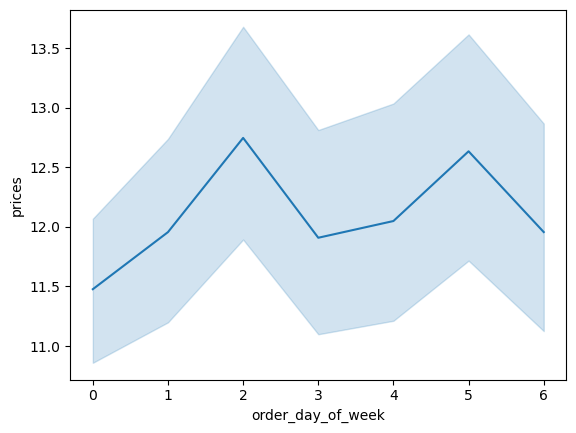

In [15]:
# Creating line chart from sbst_smll

line1 = sns.lineplot(data = sbst_smll, x = 'order_day_of_week', y = 'prices')

Q3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the _“order_hour_of_day” column._
  - In a markdown cell beneath your histogram, describe what the histogram demonstrates.

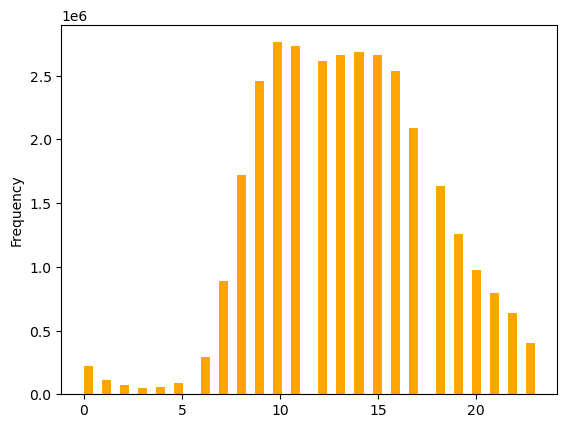

In [16]:
# Create a histogram of the “order_hour_of_day” column

hist2 = final_df['order_hour_of_day'].plot.hist(bins = 50, color = 'orange')

**DESCRIPTION:** The histogram represents the order frequency per hour. On the x-axis, it measure 0-24 hours while y-axis measures, order count in millions. The bar height represents the volume of order within hour. In this case, the highest order volume we recieve is at 10th hour and the least busiest is below 5 hours.

Q4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the _“loyalty_flag”_ column.

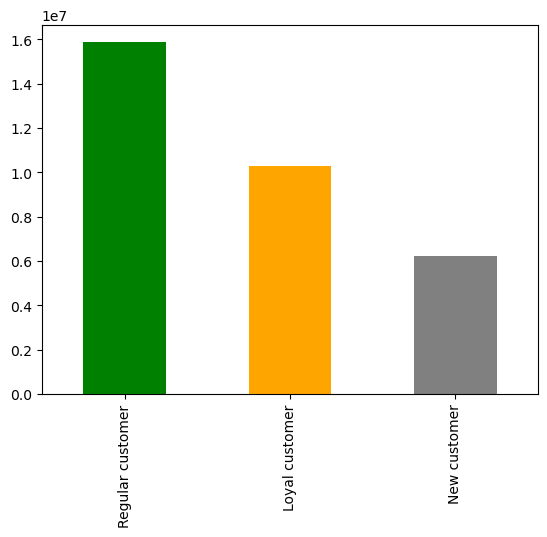

In [17]:
# Create loyalty_flag bar chart

bar_loyalty = final_df['loyalty_flag'].value_counts().plot.bar(color = ['green', 'orange', 'grey'])

Q5. Check whether there’s a difference in expenditure **(the “prices” column)** depending on the hour of the day. _(Hint: To check this, you need to use an accurate sample for your line chart!)_

In [18]:
# Create new dataframe for small subset (30% - sampling) using "prices" and "order_hour_of_day" categories

sbst2_smll = small[['order_hour_of_day','prices']]

sbst2_smll

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32404841,17,10.7
32404842,18,10.7
32404843,16,10.7
32404849,23,10.7


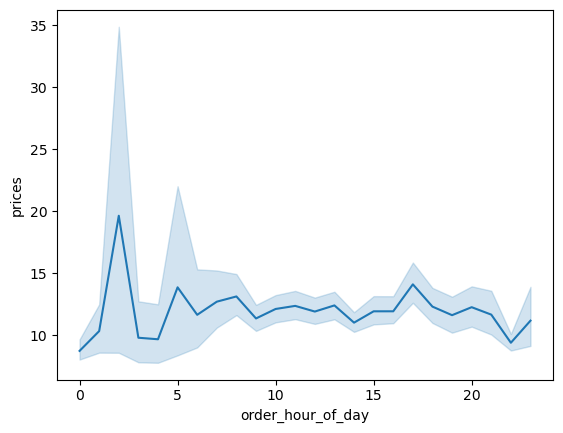

In [19]:
# Creating line chart from sbst2_smll

line2 = sns.lineplot(data = sbst2_smll, x = 'order_hour_of_day', y = 'prices')

6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

- In a markdown cell beneath your line chart, describe what the line chart shows.

In [20]:
# Create new dataframe for small subset (30% - sampling) using "Age" and "No_of_Dependants" categories

sbst3_smll = small[['Age','No_of_Dependants']]

sbst3_smll

,Age,No_of_Dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32404841,25,0
32404842,25,0
32404843,25,0
32404849,25,0


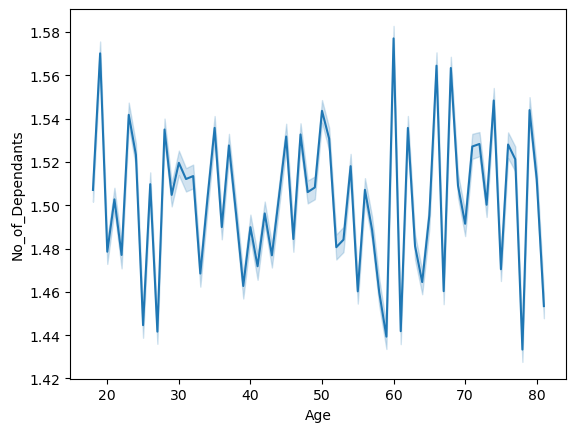

In [21]:
# Creating line chart from sbst3_smll

line3 = sns.lineplot(data = sbst3_smll, x = 'Age', y = 'No_of_Dependants')

**DESCRIPTION:** Line chart shows aggressive fluctuating trend that demonstrates an undefined relationship between age groups and its number of dependents.Therefore, there is no consistency between two variables in determining the density in demographical aspect of the target audience.

Q7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the **sns.scatterplot()** function.

- In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

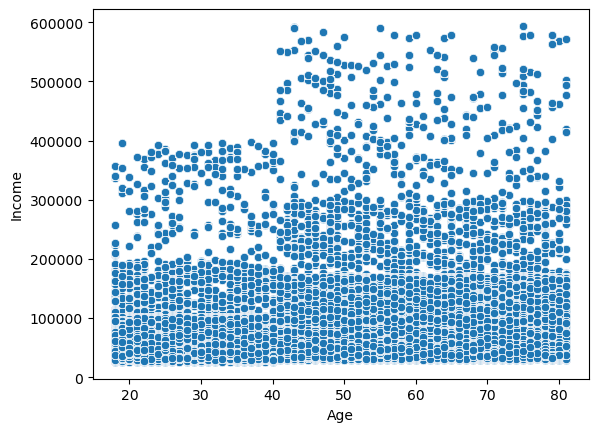

In [22]:
# Creating Scatterplot2 for spending power by age group

scatterplot2 = sns.scatterplot(x = 'Age', y = 'Income', data = final_df)

**DESCRIPTION:** 

The scatterplot determining the relationships of spending power (income) by age group, are as follows:

- The customers within ages 20-39 are split between three different income groups: 
        a) Low :          0 - 100,000 USD while, 
        c) Middle:  100,001 - 200,000 USD
        b) High:    200,001 - 400,000 USD
   
- The spending power rises as age matures making customers in 40s and older have higher income however, splitting in four groups:
        a) Low :         0 - 100,000 USD
        b) Middle:       100,001 - 200,000 USD
        c) Upper Middle: 200,001 - 400,000 USD
        d) High:         400,001 - 600,000 USD
        
- Inspite of the the age groups, looking at the scatterplot as a whole, **majority** of the customers' income are much more concenterated below 200,000 USD thus, spending power for the entire population is mostly at lower range.

****
#### 3. EXPORTING CHARTS AS IMAGES (.png files)

In [23]:
# Exporting charts to folder as image

# Bar Chart for Frequency order_day_of_week 
bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_day_of_week_bChart.png'))

# Histogram for Income 
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_hist1.png'))

# Scatterplot for Prices 
scatterplot1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_scatterplot1.png'))

# Line Chart for order_of_the_week and prices
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_day_of_week_line1.png'))

# Histogram for order_hour_of_day 
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_hist2.png'))

# Bar Chart for Loyalty Customers 
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_barChart.png'))

# Line Chart for order_hour_of_day and prices
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_line2.png'))

# Line Chart for Age and No_of_Dependants
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'No_of_Dependants_line3.png'))

# Scatterplot2 for spending power by age group
scatterplot2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_scatterplot2.png'))